In [15]:
import numpy as np
import pandas as pd
import random
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic 
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import random
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Figure size 1000x1000 with 0 Axes>

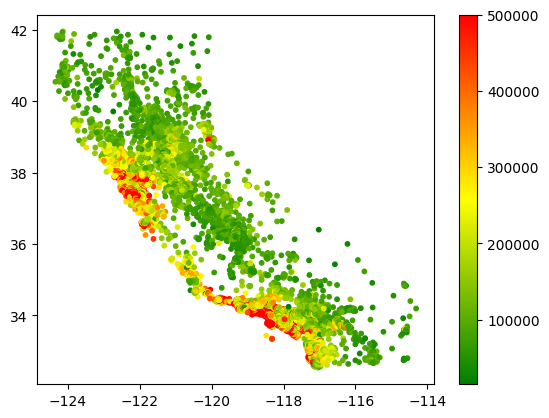

In [3]:
plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
                    s=10, cmap=cmap)
f.colorbar(points)

In [4]:
coords = [
    (34, -118.5),
    (37.8, -122)
]
for i, coord in tqdm(enumerate(coords)):
    df[f'distance_{i}'] = [geodesic((df['latitude'][j], df['longitude'][j]), coord).km for j in range(len(df))]
df

0it [00:00, ?it/s]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance_0,distance_1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,546.347528,22.106922
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,544.070665,20.480632
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,544.326987,21.846423
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,544.886390,22.699051
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,544.886390,22.699051
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,650.555584,202.622563
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,655.460491,199.811376
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,649.643536,193.273041
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,653.030905,190.387073


In [5]:
X = df.drop(columns=['median_house_value'])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_0,distance_1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,546.347528,22.106922
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,544.070665,20.480632
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,544.326987,21.846423
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,544.886390,22.699051
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,544.886390,22.699051
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,650.555584,202.622563
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,655.460491,199.811376
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,649.643536,193.273041
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,653.030905,190.387073


In [6]:
y = df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [7]:
les = dict()
for column in list(X.columns):
    if X[column].dtype == 'object':
        les[column] = LabelEncoder()
        X[column] = les[column].fit_transform(X[column])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_0,distance_1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,546.347528,22.106922
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,544.070665,20.480632
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,544.326987,21.846423
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,544.886390,22.699051
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,544.886390,22.699051
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,650.555584,202.622563
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,655.460491,199.811376
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,649.643536,193.273041
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,653.030905,190.387073


# 1 вариант. CatBoost

In [8]:
model = CatBoostRegressor(
    iterations=100000,
    depth=8, #range(1, 16 + 1)
    task_type='CPU', #GPU 
    verbose=100, #
    learning_rate=0.01 #чем меньше значение, тем лучше обучится модель, но нужно больше итераций
)
model.fit(X, y)

0:	learn: 114661.8217197	total: 62.2ms	remaining: 1h 43m 36s
100:	learn: 74393.9732596	total: 348ms	remaining: 5m 44s
200:	learn: 62124.8066960	total: 630ms	remaining: 5m 12s
300:	learn: 57090.2938764	total: 906ms	remaining: 5m
400:	learn: 54067.4089840	total: 1.18s	remaining: 4m 53s
500:	learn: 51983.9415005	total: 1.45s	remaining: 4m 47s
600:	learn: 50521.3698143	total: 1.72s	remaining: 4m 43s
700:	learn: 49345.4432488	total: 1.99s	remaining: 4m 41s
800:	learn: 48310.9541782	total: 2.25s	remaining: 4m 39s
900:	learn: 47451.8661559	total: 2.53s	remaining: 4m 37s
1000:	learn: 46614.8616028	total: 2.8s	remaining: 4m 36s
1100:	learn: 45875.8026970	total: 3.07s	remaining: 4m 35s
1200:	learn: 45169.0835367	total: 3.34s	remaining: 4m 34s
1300:	learn: 44532.1607129	total: 3.61s	remaining: 4m 33s
1400:	learn: 43903.2884699	total: 3.88s	remaining: 4m 32s
1500:	learn: 43295.7342173	total: 4.15s	remaining: 4m 32s
1600:	learn: 42746.3660088	total: 4.42s	remaining: 4m 31s
1700:	learn: 42243.334952

# 2 вариант. Random Forest

In [13]:
model = RandomForestRegressor(
    n_estimators=100, # количесвто деревьев
    max_depth=None, # максимальная глубина дерева. либо число, либо None (ограничение отсутсвует)
    n_jobs=-1, # сколько потоков использовать (-1 - использовать все доступные) 
)
model.fit(X, y)
model.score(X, y), mean_absolute_error(y, model.predict(X))

(0.9766837772216176, 11192.685787790699)

In [12]:
X = pd.read_csv('test.csv')
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
for i, coord in tqdm(enumerate(coords)):
    X[f'distance_{i}'] = [geodesic((X['latitude'][j], X['longitude'][j]), coord).km for j in range(len(X))]
X

0it [00:00, ?it/s]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_0,distance_1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,546.347528,22.106922
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,544.070665,20.480632
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,544.326987,21.846423
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,544.886390,22.699051
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,544.886390,22.699051
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,650.555584,202.622563
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,655.460491,199.811376
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,649.643536,193.273041
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,653.030905,190.387073


In [14]:
for column in list(les.keys()):
    if X[column].dtype == 'object':
        X[column] = les[column].transform(X[column])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,distance_0,distance_1
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,546.347528,22.106922
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,544.070665,20.480632
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,544.326987,21.846423
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,544.886390,22.699051
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,544.886390,22.699051
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,650.555584,202.622563
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,655.460491,199.811376
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,649.643536,193.273041
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,653.030905,190.387073


In [17]:
y = model.predict(X)
y

array([452764.69294995, 360369.89350386, 356259.86364339, ...,
        91080.91613499,  83644.0389073 ,  85522.87461544])

In [18]:
df = pd.read_csv('sample_submission.csv')
df['median_house_value'] = y
df.to_csv('submission.csv', index=False)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452764.692950
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,360369.893504
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,356259.863643
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,343471.510699
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342067.204973
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,76542.565184
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,78736.420941
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,91080.916135
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,83644.038907


# Если все очень плохо

In [16]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit_transform(pd.read_csv('housing.csv')['median_house_value'].to_numpy().reshape(-1, 1))

array([[0.90226638],
       [0.70824656],
       [0.69505074],
       ...,
       [0.15938285],
       [0.14371281],
       [0.15340349]])

In [17]:
X = pd.read_csv('test.csv')
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [23]:
y = scaler.inverse_transform(np.random.rand(len(df), 1)).flatten()
y

array([341219.34108837, 319169.89581087, 271493.20408694, ...,
       145045.81831136, 289308.87277839, 326721.39042001])

In [24]:
df = pd.read_csv('sample_submission.csv')
df['median_house_value'] = y
df.to_csv('submission.csv', index=False)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,341219.341088
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,319169.895811
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,271493.204087
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,123131.222732
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,26888.552412
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,309949.717829
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,223395.684851
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,145045.818311
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,289308.872778
